<a href="https://colab.research.google.com/github/brianr114/pytorch_for_beginners/blob/examples/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Image Classifier (AlexNet)

# Download required files to Colab. 
- Note: they will be deleted when notebook instance is closed

In [ ]:
import urllib.request
root = "https://raw.githubusercontent.com/joe-papa/pytorch-beginners-course/main/assets/"
urls  = [
  [root+"tensor_batch_1.pt", "tensor_batch_1.pt"],
  [root+"tensor_batch_2.pt", "tensor_batch_2.pt"],
  [root+"tensor_batch_3.pt", "tensor_batch_3.pt"],
  [root+"tensor_batch_4.pt", "tensor_batch_4.pt"],
  [root+"tensor_batch_1-4.pt", "tensor_batch_1-4.pt"],
  [root+"imagenet_class_labels.txt", "imagenet_class_labels.txt"],
  ]

for url, fpath in urls:
  urllib.request.urlretrieve(url, fpath)


# Image Classifier

In [ ]:
import torch
from torchvision import models

import matplotlib.pyplot as plt

In [ ]:
img_tensor_batch = torch.load('tensor_batch_1.pt')
img_tensor_batch.shape

torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


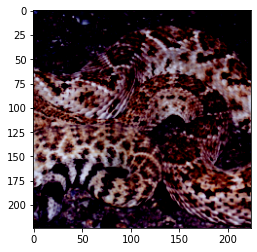

In [ ]:
plt.imshow(img_tensor_batch.squeeze().permute(1,2,0)/img_tensor_batch.abs().max())

In [ ]:
model = models.alexnet(pretrained=True)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
y = model(img_tensor_batch)
print(y.shape)

torch.Size([1, 1000])


In [ ]:
_, index = y.max(1)
print(index)

tensor([66])


In [ ]:
with open('imagenet_class_labels.txt', 'r') as f:
  labels = eval(f.read())

In [ ]:
labels[index.item()]

'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus'

# Go back and load tensor_batch_2.pt

# Short Version

In [ ]:
import torch
from torchvision import models
import matplotlib.pyplot as plt

model = models.alexnet(pretrained=True)
model.eval()
with open('imagenet_class_labels.txt', 'r') as f:
  labels = eval(f.read())

def classify_tensor_batch(batch_file):
  img_tensor_batch = torch.load(batch_file)
  y = model(img_tensor_batch)
  _, index = y.max(1)
  return [labels[idx.item()] for idx in index]

In [ ]:
classify_tensor_batch('tensor_batch_1.pt')

['horned viper, cerastes, sand viper, horned asp, Cerastes cornutus']

# Go back and run for
- tensor_batch_2.pt
- tensor_batch_3.pt
- tensor_batch_4.pt
- tensor_batch_1-4.pt

# Try Later:
- Add code to classify_tensor_batch() that plots image